In [71]:
import pandas as pd
import glob

# Data import

In [72]:
df = pd.read_csv('data/NBA_Player_Dataset-2013-2021.csv')

box_cox_transformer = 0.16069993379755618 #need to pull from data_prep.ipynb

# Scale Data

In [73]:
#First scaling 2021 season to a full season
#roughly 10 games left for all teams out of 82

scale_factor = 1 + 10/82
#scale_factor = 1

#columns to scale

cols_to_scale = ['GP', 'FTA', '2PA', '3PA']

df[cols_to_scale] = df[cols_to_scale] * scale_factor

In [74]:
#variables we need to scale

x_to_scale = df[['AGE', 'GP', 'MPG', 'MIN%', 'USG%',
       'FTA', 'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG', 'RPG',
       'TRB%', 'APG', 'AST%', 'SPG', 'BPG', 'VI', 'TO_100_Games']]

#scaler function
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_to_scale)

x_scaled = scaler.transform(x_to_scale)

x_scaled_df = pd.DataFrame(x_scaled, columns = x_to_scale.columns)

In [75]:
#add the categorical features to scaled features for input
X_with_year = pd.concat([x_scaled_df, df[['Year', 'Center', 'Forward', 'Guard']]], axis = 1)

#choose our target variable
#y = df['Salary']
y = df['Salary_BoxCox']

# Read in results from models_final.ipynb

In [84]:
df_list = []

for file in glob.glob('results/*.csv'):
    temp_df = pd.read_csv(file)
    df_list.append(temp_df)

results_df = pd.concat(df_list, axis = 0)

In [85]:
#Remove the columns specific to certain models, all parameters are stored in 'params' column

results_df = results_df[['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'params', 
                        'mean_test_score', 'std_test_score', 'rank_test_score', 'Model Type', 'Training Data']]

In [86]:
# add transformed rmse to tables
#from scipy.special import inv_boxcox
#results_df['mean_test_score_transformed'] = inv_boxcox(results_df['mean_test_score'], box_cox_transformer)

In [91]:
#so far best model is RF with full dataset.  
results_df.sort_values('mean_test_score', ascending = True).to_csv('results_model_results.csv', index = False)
results_df.sort_values('mean_test_score', ascending = True).head(15)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score,rank_test_score,Model Type,Training Data
9,6.268424,0.291347,0.088201,0.005809,"{'max_depth': 25, 'max_features': 10, 'n_estim...",9.148185,0.202884,1,Random Forest,Full Dataset
3,4.230464,0.088100,0.073199,0.003429,"{'max_depth': 10, 'max_features': 10, 'n_estim...",9.172347,0.211825,2,Random Forest,Full Dataset
8,2.445698,0.144679,0.043400,0.003008,"{'max_depth': 25, 'max_features': 10, 'n_estim...",9.181977,0.176333,3,Random Forest,Full Dataset
5,8.183368,0.518071,0.074601,0.003772,"{'max_depth': 10, 'max_features': 20, 'n_estim...",9.185676,0.215620,4,Random Forest,Full Dataset
11,9.557656,0.541475,0.073634,0.001832,"{'max_depth': 25, 'max_features': 20, 'n_estim...",9.198326,0.179902,5,Random Forest,Full Dataset
2,1.852591,0.320262,0.031801,0.002317,"{'max_depth': 10, 'max_features': 10, 'n_estim...",9.203888,0.198721,6,Random Forest,Full Dataset
4,3.499286,0.396439,0.035399,0.005537,"{'max_depth': 10, 'max_features': 20, 'n_estim...",9.208470,0.223478,7,Random Forest,Full Dataset
10,4.315410,0.069784,0.042802,0.004166,"{'max_depth': 25, 'max_features': 20, 'n_estim...",9.219631,0.178726,8,Random Forest,Full Dataset
7,3.679764,0.176141,0.098961,0.004070,"{'max_depth': 25, 'max_features': 5, 'n_estima...",9.221386,0.229243,9,Random Forest,Full Dataset
6,1.474543,0.058361,0.040600,0.001020,"{'max_depth': 25, 'max_features': 5, 'n_estima...",9.223172,0.205839,10,Random Forest,Full Dataset


In [88]:
#worst models
results_df.sort_values('mean_test_score', ascending = True).tail(15)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score,rank_test_score,Model Type,Training Data
41,1.384793,0.050253,0.296631,0.016345,"{'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}",50.436944,4.067735,57,SVM,Full Dataset
44,1.230184,0.010186,0.239600,0.004841,"{'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}",100.884112,5.798606,56,SVM,Subset Dataset
41,1.245260,0.011759,0.239966,0.007104,"{'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}",100.918061,6.711417,57,SVM,Subset Dataset
50,1.384274,0.053852,0.282802,0.017997,"{'C': 10, 'gamma': 'auto', 'kernel': 'sigmoid'}",463.562443,36.662448,58,SVM,Full Dataset
47,1.392023,0.046768,0.288401,0.017895,"{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}",520.176297,46.029433,59,SVM,Full Dataset
47,1.288599,0.048294,0.258568,0.023881,"{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}",1002.214085,67.673235,58,SVM,Subset Dataset
50,1.236902,0.059438,0.245200,0.013875,"{'C': 10, 'gamma': 'auto', 'kernel': 'sigmoid'}",1002.429532,59.529284,59,SVM,Subset Dataset
56,1.424789,0.052959,0.279328,0.009446,"{'C': 100, 'gamma': 'auto', 'kernel': 'sigmoid'}",3913.287950,685.142338,60,SVM,Full Dataset
53,1.371933,0.052048,0.275657,0.016883,"{'C': 100, 'gamma': 'scale', 'kernel': 'sigmoid'}",4729.386173,510.797848,61,SVM,Full Dataset
56,1.523228,0.164177,0.268319,0.023041,"{'C': 100, 'gamma': 'auto', 'kernel': 'sigmoid'}",10009.943693,588.147454,60,SVM,Subset Dataset


In [89]:
#parameters for best model
best_params = results_df.sort_values('mean_test_score', ascending = True).iloc[0]['params']
best_params

"{'max_depth': 25, 'max_features': 10, 'n_estimators': 250}"

# Best of each model type

In [95]:
best_models = results_df[results_df['rank_test_score'] == 1].sort_values('mean_test_score')
best_models.drop(['std_fit_time', 'std_score_time', 'rank_test_score'], axis = 1, inplace = True)
best_models.to_csv('results_best_models.csv', index = False)

best_models = best_models.round(2)

best_models

,mean_fit_time,mean_score_time,params,mean_test_score,std_test_score,Model Type,Training Data
9,6.27,0.09,"{'max_depth': 25, 'max_features': 10, 'n_estim...",9.15,0.20,Random Forest,Full Dataset
49,1.37,0.61,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",9.42,0.23,SVM,Full Dataset
11,0.01,0.15,"{'n_neighbors': 20, 'p': 2, 'weights': 'distan...",9.73,0.22,KNN,Full Dataset
7,10.46,0.16,"{'learning_rate': 0.01, 'n_estimators': 500}",9.78,0.20,AdaBoost DT Regression,Full Dataset
2,0.01,0.00,{'alpha': 0.1},9.87,0.30,Ridge Regression,Full Dataset
4,0.93,0.00,"{'alpha': 0.001, 'l1_ratio': 0.9}",9.88,0.29,Elastic Net Regression,Full Dataset
0,0.16,0.00,{'alpha': 0.001},9.88,0.29,Lasso Regression,Full Dataset
46,1.23,0.56,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",10.84,0.31,SVM,Subset Dataset
12,0.01,0.05,"{'n_neighbors': 50, 'p': 1, 'weights': 'uniform'}",10.93,0.35,KNN,Subset Dataset
0,0.01,0.00,{'fit_intercept': True},11.39,0.31,Linear Regression,Subset Dataset


# Train model on previous years, predict on 2021 season

In [43]:
X_train = X_with_year[X_with_year['Year'] != 2021].drop('Year', axis = 1)
#y_train = df['Salary_BoxCox'][df['Year'] != 2021]
y_train = df['Salary_Scaled_BoxCox'][df['Year'] != 2021]

X_test = X_with_year[X_with_year['Year'] == 2021].drop('Year', axis = 1)
#y_test = df['Salary_BoxCox'][df['Year'] == 2021]
y_test = df['Salary_Scaled_BoxCox'][df['Year'] == 2021]

### Should remove outliers here

In [44]:
#remove outliers

### Train our best model

In [45]:
from sklearn.ensemble import RandomForestRegressor

rand_forest = RandomForestRegressor(max_depth =  25, max_features =  10, n_estimators = 250)

In [46]:
rand_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, max_features=10, n_estimators=250)

### Predict

In [47]:
y_pred = rand_forest.predict(X_test)

In [48]:
#invert our box cox transform so we go from normal distro to actual salary numbers.  
from scipy.special import inv_boxcox

y_pred_salary = inv_boxcox(y_pred, box_cox_transformer)
y_test_salary = inv_boxcox(y_test, box_cox_transformer)

In [49]:
results = pd.DataFrame(zip(y_test_salary, y_pred_salary), columns = ['True Salary', 'Predicted Salary'])
results['Error'] = results['Predicted Salary'] - results['True Salary']

#convert to ints for easy viewing
results[['True Salary', 'Predicted Salary', 'Error']] = results[['True Salary', 'Predicted Salary', 'Error']].astype(int)


In [50]:
player_team = df[['FULL NAME', 'TEAM']][df['Year'] == 2021].reset_index(drop = True)

In [51]:
predicting_2021 = pd.merge(player_team, results, left_index=True, right_index=True)

predicting_2021['Absolute Error'] = abs(predicting_2021['Error'])

In [52]:
predicting_2021.sort_values('Error', ascending = True).to_csv('2021_predictions.csv', index = False)

In [53]:
#Overpaid players (worst value players)
predicting_2021.sort_values('Error', ascending = True).head(25)

,FULL NAME,TEAM,True Salary,Predicted Salary,Error,Absolute Error
496,Blake Griffin,Bro,32424687,5581154,-26843533,26843533
41,Kemba Walker,Nyk,34987927,8869187,-26118740,26118740
412,Klay Thompson,Gol,38003116,13388674,-24614442,24614442
306,Kevin Love,Cle,31276406,9777998,-21498407,21498407
304,Russell Westbrook,Lal,44237527,28724217,-15513310,15513310
108,Andrew Wiggins,Gol,31597741,16535174,-15062567,15062567
259,Markelle Fultz,Orl,16509094,1633370,-14875724,14875724
98,Kristaps Porzingis,Dal,31668996,16920933,-14748063,14748063
523,Joe Harris,Bro,17366750,2660608,-14706141,14706141
297,D'Angelo Russell,Min,30030871,15775683,-14255187,14255187


In [54]:
#Underpaid Players (Best value players)
predicting_2021.sort_values('Error', ascending = False).head(25)

,FULL NAME,TEAM,True Salary,Predicted Salary,Error,Absolute Error
147,Reggie Jackson,Lac,10390003,23084297,12694294,12694294
8,Jalen Brunson,Dal,1802868,12799078,10996210,10996210
154,Andre Drummond,Phi,2402649,12089180,9686530,9686530
172,Jonas Valanciunas,Nor,14007610,23024840,9017229,9017229
415,Dejounte Murray,San,15437336,23064687,7627350,7627350
313,Miles Bridges,Cha,5424205,12587681,7163476,7163476
257,Jae'Sean Tate,Hou,1518653,8626198,7107545,7107545
453,Bobby Portis,Mil,4349731,11364995,7015263,7015263
131,LaMarcus Aldridge,Bro,2642926,9581615,6938688,6938688
100,Carmelo Anthony,Lal,2642926,9570239,6927313,6927313


In [55]:
#Best Predicted players
predicting_2021.sort_values('Absolute Error', ascending = True).head(25)

,FULL NAME,TEAM,True Salary,Predicted Salary,Error,Absolute Error
407,Brodric Thomas,Bos,462809,465681,2871,2871
501,Theo Pinson,Dal,440881,436148,-4732,4732
245,Moses Wright,Lac,172881,180742,7861,7861
481,Louis King,Sac,316514,303909,-12604,12604
373,Alperen Sengun,Hou,3216212,3229078,12866,12866
505,Semi Ojeleye,Mil,1790061,1803699,13637,13637
220,Tremont Waters,Tor,191927,205698,13770,13770
476,JaQuori McLaughlin,Dal,220757,205323,-15434,15434
110,Tre Jones,San,1518653,1534661,16008,16008
352,Theo Maledon,Okc,2000910,1984850,-16059,16059


In [59]:
predicting_2021['Absolute Error'].sum() / predicting_2021.shape[0]

2648716.003724395

In [ ]:
#Group by team
team_predictions = predicting_2021.groupby('TEAM').sum().reset_index()

In [ ]:
#Sorted by most overpaid/underperforming teams.  Looks about right.  
team_predictions.sort_values('Error', ascending = True)

,TEAM,True Salary,Predicted Salary,Error,Absolute Error
2,Bro,193734909,144183571,-49551338,91654554
5,Cle,133691608,88206337,-45485270,54891944
17,Min,137213658,92603532,-44610124,62172512
19,Nyk,133969612,92296082,-41673530,58548534
9,Gol,166958815,129033223,-37925595,82881341
0,Atl,131804432,97235274,-34569160,47680266
28,Uta,154070515,120281336,-33789176,46416506
1,Bos,124721799,91936834,-32784966,37634102
27,Tor,121159710,91346442,-29813268,39043886
21,Orl,84861162,58518713,-26342454,52835590


In [ ]:
#Sorted by highest predicted salary
team_predictions.sort_values('Predicted Salary', ascending = False)

,TEAM,True Salary,Predicted Salary,Error,Absolute Error
13,Lal,174122358,149892038,-24230323,74030221
16,Mil,157104841,149199681,-7905168,62000860
2,Bro,193734909,144183571,-49551338,91654554
9,Gol,166958815,129033223,-37925595,82881341
24,Por,132438025,127812811,-4625216,45627264
28,Uta,154070515,120281336,-33789176,46416506
4,Chi,120012702,118206204,-1806500,40520550
22,Phi,110336652,114173748,3837094,52797600
15,Mia,132959544,112865270,-20094275,45050613
29,Was,136368193,111619863,-24748326,52665804


# Viz

Who are the outliers in the distribution of error plot?  

<AxesSubplot:xlabel='Error', ylabel='Count'>

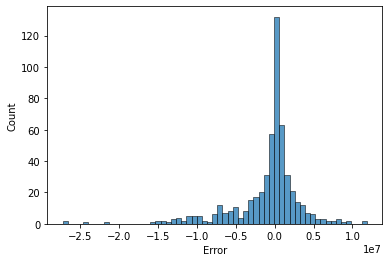

In [ ]:
#viz
import seaborn as sns

sns.histplot(predicting_2021['Error'])